***This project is about stocks analysis. The idea of the project is that an analyst might want to get some initial information about a given stock. The first part analyze one stock and the secound part analyze a portfolio of two stocks. The analysis will be based on the FAANG stocks, i.e. Amazon, Apple, Google, Facebook and Netflix.***

In [97]:
# Relevant packages and data is loaded.
import pandas as pd
import numpy as np
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
start = datetime.datetime(2014,1,1)
end   = datetime.datetime(2018,1,1)

# Selecting the five firms. We get the data through an API. 
amzn = pandas_datareader.iex.daily.IEXDailyReader('AMZN', start, end).read()
amzn['firm'] = 'Amazon'

apl = pandas_datareader.iex.daily.IEXDailyReader('AAPL', start, end).read()
apl['firm'] = 'Apple'

googl = pandas_datareader.iex.daily.IEXDailyReader('GOOGL', start, end).read()
googl['firm'] = 'Google'

fb = pandas_datareader.iex.daily.IEXDailyReader('FB', start, end).read()
fb['firm'] = 'Facebook'

nflx = pandas_datareader.iex.daily.IEXDailyReader('NFLX', start, end).read()
nflx['firm'] = 'Netflix'

First we compare the development of the stocks by using an Index, i.e. showing the relative return of the stocks.

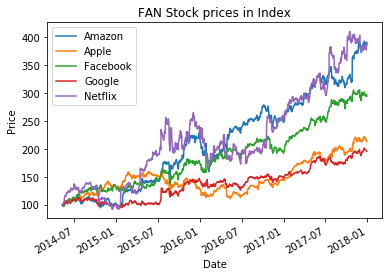

In [98]:
# Stocks are combined into one column
stocks = pd.concat([amzn,fb,nflx,apl,googl])
stocks.index = pd.to_datetime(stocks.index)

# Making an Index by dividing with the first observation for each stock
stocks['close_norm'] = stocks.groupby('firm')['close'].transform(lambda x: x/x[0]*100)
stocks.groupby('firm')['close_norm'].plot(legend=True);
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('FAN Stock prices in Index'); 

*The graph gives the investor an inital overview of the development of the stocks be comparing the relative return. The relative return varies a lot between the stocks, were Netflix and Amazon have had the highest return and Apple and Google have had the lowest.*

**In order to make the following code run more smoothly a Dataframe is carried out**

In [99]:
# Creating a DataFrame that has the closing prices as columns.
df = pd.DataFrame()
df['Amazon'] = amzn['close']
df['Google'] = googl['close']
df['Apple'] = apl['close']
df['Facebook'] = fb['close']
df['Netflix'] = nflx['close']

# Converting index to 'datetime' 
df.index = pd.to_datetime(df.index)

# Resampling the full DataFrame to monthly timeframe
monthly_df = df.resample('BMS').first()
monthly_df.head(5)

,Amazon,Google,Apple,Facebook,Netflix
date,,,,,
2014-05-01,302.86,538.43,77.6204,59.83,49.3500
2014-06-02,308.84,564.34,82.3104,63.08,60.2942
2014-07-01,332.39,591.49,85.7133,68.06,67.5856
2014-08-01,307.06,573.60,88.1054,72.36,60.7714
2014-09-01,342.38,588.63,95.1478,76.68,68.0856


In [100]:
# Calculating daily returns of stocks
returns_daily = df.pct_change().dropna()

# Calculating monthly returns of the stocks
returns_monthly = df.pct_change().dropna()

**The following analysis will be base on one stock**

The interactive plots contain...

1. The daily and average return of a given stock.
2. A histogram to aid the analyst in evaluating the distribution of the stock in order to see if the daily return is right/left skewed.
3. A plot of the 30-day rolling variance, i.e. a plot of the 30-day conditional variance and the average variance. The investor want the variance to be as low a possible in order to lower the risk.

The plots are interactive in the sense that the analyst can chooses a stock he is interested to analyze.

In [121]:
# Making the plot interactively
@interact

# Define the functions and design the plots
def distributions(stock=(returns_daily.select_dtypes('number').columns)):
                  distributions = returns_daily[stock]
                  print(f" Average return: {round(100*returns_daily[stock].mean(),3)}"+" pct.")
                  plt.xlabel('Date')
                  plt.plot(distributions)
                  plt.title('Daily return'); 
                  plt.show()
                  plt.xlabel('Date')
                  plt.hist(distributions, bins=75)
                  plt.title('Daily return'); 
                  plt.show()
                  variance = returns_daily[stock].rolling(30).std()
                  print(f" Average variance: {round(returns_daily[stock].std(),3)}")
                  plt.plot(variance)
                  plt.xlabel('Day')
                  plt.ylabel('30-day Rolling variance');

interactive(children=(Dropdown(description='stock', options=('Amazon', 'Google', 'Apple', 'Facebook', 'Netflix…

In the given period Netflix has the higest return, but also the highest varince. Apple has the lowest return but also the lowest variance. This follow the theory, that in order to get a higher return the investor needs to take more risk.

**The following analysis will be base on a portfolio of two stocks**

Since much financial data resemble a random walk (i.e. an unpredictable pattern) an investor might want to buy more the one stock in order to reduce his risk. When making a portfolio of stocks the investor is therefore interested in the correlation between the stocks, in order to lower the risk of the portfolio. The correlation between the stocks will be shown in the following and also the development of the stocks.

The interactive plots contain...
1. The unconditional correlation between the daily return series of two stocks. This is printed above the plots. This measure is important, as it is the average correlation between the two series. However, since we are dealing with time series, deviations can occur in the short run, and it can therefore be a missleading measure if the series aren't evaluated properly, as it contains much condensed information.

2. It contains a plot of the 30 day rolling unconditional correlation of the daily return series. The plot can be used to evaluate the development of the unconditional variance, in order to see if there is large variation in the correlation between two stocks.

3. A plot of the closing prices. This is here to get an idea of how the underlying DGP of the two series look next to each other.

Again the plots are interactivs so the investor can chooses wich stocks he wants to see the correlation between.

In [122]:
# Making the plot interactively
@interact

# Define the functions and design the plots
def rolling_correlation(stock1=(returns_daily.select_dtypes('number').columns),
                stock2=(returns_daily.select_dtypes('number').columns)[1:]):
    rolling_correlation = returns_daily[stock1].rolling(30).corr(returns_daily[stock2])
    print(f" Unconditional correlation between the two stocks: {round(100 * returns_daily[stock1].corr(returns_daily[stock2]),1)}"+" pct.")
    plt.plot(rolling_correlation)
    plt.xlabel('Day')
    plt.ylabel('30-day Rolling Correlation')
    plt.show()
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title('Development of the stocks'); 
    plt.plot(df[[stock1,stock2]])
    plt.show();

interactive(children=(Dropdown(description='stock1', options=('Amazon', 'Google', 'Apple', 'Facebook', 'Netfli…

The ideal situation for an investor is to get a high return with low risk. When making a portfolio of stocks the investor is therefore interested in the correlation between the stocks, in order to lower the risk of the portfolio. Hence this analysis is based only on technology stocks, it is expected that the correlation between the stocks are relatively high. Despite this, an investor might want to make an portfolio of Netflix and Apple, hence there unconditional correlation are 28.99 pct - the lowest between the stocks. Here it is assumed that the historical development will continue in the future. 